<a href="https://colab.research.google.com/github/viviannemedeiros/dataScience/blob/master/convenios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projeto - Introdução à Ciência dos Dados** 

**Prof:** Luciano Barbosa

**Discente:** Vivianne Medeiros


**Objetivo:** analisar a base de dados dos Convênios celebrados pelo Governo Federal para identificar o padrão de distribuição e alocação dos recursos

**Fonte dos dados:** [Portal da Transparência - Convênios](http://portaltransparencia.gov.br/download-de-dados/convenios)   

[Dicionário de Dados](http://www.portaldatransparencia.gov.br/pagina-interna/603415-dicionario-de-dados-convenios)

**Ressalva:** Como o tamanho do arquivo original era superior a 250MB e o git tem uma restrição de upload de até 25MB por arquivo, selecionou-se as 39.999 primeiras linhas para utilização neste projeto, acreditando-se que ainda assim os objetivos educacionais seriam cumpridos.

## Leitura de arquivo e operações iniciais

In [267]:
import numpy as np
import pandas as pd
convenios=pd.read_csv("https://raw.githubusercontent.com/viviannemedeiros/dataScience/master/convenios.csv", 
                      encoding = "ISO-8859-1", sep=";", decimal=",")
pd.set_option('display.max_colwidth', -1)
convenios.head()

,NÚMERO CONVÊNIO,UF,CÓDIGO SIAFI MUNICÍPIO,NOME MUNICÍPIO,SITUAÇÃO CONVÊNIO,NÚMERO ORIGINAL,OBJETO DO CONVÊNIO,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO CONCEDENTE,NOME ÓRGÃO CONCEDENTE,CÓDIGO CONVENENTE,TIPO CONVENENTE,NOME CONVENENTE,TIPO ENTE CONVENENTE,TIPO INSTRUMENTO,VALOR CONVÊNIO,VALOR LIBERADO,DATA PUBLICAÇÃO,DATA INÍCIO VIGÊNCIA,DATA FINAL VIGÊNCIA,VALOR CONTRAPARTIDA,DATA ÚLTIMA LIBERAÇÃO,VALOR ÚLTIMA LIBERAÇÃO
0,104141,SP,6689,MAUA,CONCLUÍDO,2467/94/FAE,CONVENIO CELEBRADO ENTRE A FAE E A PM DE MAUA/SP PARA ATENDER PROGRAMA DE ALIMENTACAO ESCOLAR PROC 1118/94-83 _______________________________________ANA LUCIA,26000,Ministério da Educação,26298,Fundo Nacional de Desenvolvimento da Educação,46522959000198,Administração Pública Municipal,MUNICIPIO DE MAUA,Municipal,Sem informação,2110457.00,2054267.71,28/03/1996,28/02/1996,28/02/1999,0.0,07/12/1995,0.00
1,104773,RS,8963,VIAMAO,ADIMPLENTE,2520/94/FAE,"CONVENIO CELEBRADO ENTRE A FAE E P.M. DE VIAMAO/RS, PARA ATENDER AO PROGRAMA MERENDA ESCOLAR. PROC. 1752/94-99.",26000,Ministério da Educação,26298,Fundo Nacional de Desenvolvimento da Educação,88000914000101,Administração Pública Municipal,MUNICIPIO DE VIAMAO,Municipal,CONVENIO,515877.96,406200.76,19/03/1996,27/02/1996,28/02/1999,0.0,13/12/1995,0.00
2,112236,PE,2531,RECIFE,CONCLUÍDO,PG 096/94-00,EXECUCAO DE OBRAS E SERVICOS DE CONSTRUCAO RODOVIARIA NA BR-020/PI TRECHO PICOS - SAO RAIMUNDO NONATO.,39000,Ministério da Infraestrutura,39252,Departamento Nacional de Infraestrutura de Transportes,160202,Entidades Empresariais Privadas,3º BATALHÃO DE ENGENHARIA DE CONSTRUÇÃO,Municipal,Sem informação,19439537.00,17777924.41,24/12/1999,15/11/2002,28/06/2005,0.0,28/12/2004,0.00
3,116570,SP,6219,BAURU,CONCLUÍDO,1640/94,PROSSEGUIMENTO A OBRA DA NOVA UNIDADE DE INTERNACAO HOSPITALAR DO HPLLP/USP.,36000,Ministério da Saúde,36000,Ministério da Saúde - Unidades com vínculo direto,63025530008270,Administração Pública Estadual ou do Distrito Federal,UNIVERSIDADE DE SAO PAULO,Estadual,Sem informação,5000000.00,5000000.00,27/02/1998,29/12/1995,30/06/1998,0.0,29/12/1994,0.00
4,120304,RJ,6001,RIO DE JANEIRO,CONCLUÍDO,01/93 8/9. T.A.,SUPLEMENTACAO DE RECURSOS A FIM DE CUMPRIR OS OBJETIVO DO ACONVENIO ORIGINAL.,36000,Ministério da Saúde,36201,Fundação Oswaldo Cruz,30495394000167,Administração Pública Estadual ou do Distrito Federal,FUNDACAO CARLOS CHAGAS FILHO DE AMPARO A PESQUISA DO ESTADO DO RIO DE JANEIRO-FAPERJ,Estadual,Sem informação,12741999.13,11415402.92,21/12/2000,24/11/1995,28/02/2002,0.0,19/12/2001,153846.11


In [268]:
convenios.sort_values('VALOR CONVÊNIO', ascending=False).head(3)

,NÚMERO CONVÊNIO,UF,CÓDIGO SIAFI MUNICÍPIO,NOME MUNICÍPIO,SITUAÇÃO CONVÊNIO,NÚMERO ORIGINAL,OBJETO DO CONVÊNIO,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO CONCEDENTE,NOME ÓRGÃO CONCEDENTE,CÓDIGO CONVENENTE,TIPO CONVENENTE,NOME CONVENENTE,TIPO ENTE CONVENENTE,TIPO INSTRUMENTO,VALOR CONVÊNIO,VALOR LIBERADO,DATA PUBLICAÇÃO,DATA INÍCIO VIGÊNCIA,DATA FINAL VIGÊNCIA,VALOR CONTRAPARTIDA,DATA ÚLTIMA LIBERAÇÃO,VALOR ÚLTIMA LIBERAÇÃO
3336,300186,DF,9701,BRASILIA,CONCLUÍDO,001/96,"TRANSFERENCIA DE RECURSOS FINANCEIROS PARA PAGAMENTO DO PESSOAL ATIVO,INATIVO E PENSIONISTAS, DAS AREAS DE SEGURANCA PUBLICA, EDUCACAO E SAUDE, BEM COMO O CUSTEIO DA SEGURANCA PUBLICA DO DISTRITO FEDERAL, EMCONFORMIDADE COM DISPOSITIVOS CONSTITUCIONAIS E OS DECRETOS 48.297 E48.298, AMBOS DE 17.06.60.",25000,Ministério da Economia,25000,Ministério da Economia - Unidades com vínculo direto,00394601000126,Administração Pública Estadual ou do Distrito Federal,DISTRITO FEDERAL,Estadual,Sem informação,3.620084e+09,3.620084e+09,10/01/1996,10/01/1996,31/12/1997,0.0,31/12/1997,2300000.00
4409,301431,DF,9701,BRASILIA,CONCLUÍDO,001/MPAS/SAS/96,"REPASSE DE VERBAS PARA O INSS VISANDO AO PAGAMENTO DO BENEFICIO DE PRESTACAO CONTINUADA, CONFORME O DISPOSTO NOS ARTS. 20, 21 E 35 DA LEIORGANICA DA ASSISTENCIA SOCIAL-LOAS E CONV. NUM 001/MPAS/SAS/96.",55000,Ministério da Cidadania,55001,Fundo Nacional de Assistência Social,510001,Agentes Intermediários,"COORD.GERAL DE ORÇAMENTO, FINANÇAS E CONTAB.",Municipal,Sem informação,1.052503e+09,8.634987e+08,13/03/1996,13/03/1996,31/12/1997,0.0,12/12/1997,54000000.03
1977,298495,RJ,6001,RIO DE JANEIRO,CONCLUÍDO,39300357200700262,"OBJETO: EXECUÇÃO DAS OBRAS DE IMPLANTAÇÃO E PAVIMENTAÇÃO DO ARCO METROPOLITANO DO RIO DE JANEIRO NA BR-493/RJ, COMPREENDIDO ENTRE O ENTROCAMENTO COM A BR-040/116(B)/RJ, ATÉ O ENTROCAMENTOCOM A BR-101/RJ, COMPREENDENDO AS OBRAS DE TERRAPLENAGEM, DRENAGEM, PAVIMENTAÇÃO OBRAS DE ARTE ESPECIAIS E TODAS AS DEMAIS PREVISTAS. LEI 11.578/2007, DECRETO N 6.450/2008 TRANSFERÊNCIA OBRIGATÓRIA. TERMO DE COMPROMISSO ASSINADO EM",39000,Ministério da Infraestrutura,39252,Departamento Nacional de Infraestrutura de Transportes,08599767000190,Administração Pública Estadual ou do Distrito Federal,SECRETARIA DE ESTADO DE INFRAESTRUTURA E OBRAS - SEINFRA,Estadual,Sem informação,7.000000e+08,0.000000e+00,19/12/2007,18/12/2007,18/10/2010,228681172.0,20/05/2009,34487090.00


In [269]:
# Verificando a quantidade de dados
convenios.shape
# len(convenios)

(39999, 24)

In [0]:
# Excluindo colunas que não serão objeto de análise
convenios = convenios.drop(['NÚMERO CONVÊNIO', 'CÓDIGO SIAFI MUNICÍPIO', 'NÚMERO ORIGINAL', 'OBJETO DO CONVÊNIO', 
                            'CÓDIGO ÓRGÃO SUPERIOR', 'CÓDIGO ÓRGÃO CONCEDENTE', 'CÓDIGO CONVENENTE','DATA PUBLICAÇÃO'], axis=1)

In [271]:
#Constantdo a quantidade de dados atuais
convenios.shape

(39999, 16)

In [272]:
convenios.describe()

,VALOR CONVÊNIO,VALOR LIBERADO,VALOR CONTRAPARTIDA,VALOR ÚLTIMA LIBERAÇÃO
count,3.999900e+04,3.999900e+04,3.999900e+04,3.999900e+04
mean,6.344792e+05,4.853171e+05,6.700967e+04,6.149511e+04
std,2.024115e+07,1.928241e+07,2.102704e+06,5.095207e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+04,6.692760e+03,0.000000e+00,4.000000e+02
50%,3.500000e+04,2.783770e+04,0.000000e+00,7.000000e+03
75%,1.125233e+05,9.722743e+04,6.349750e+03,3.750000e+04
max,3.620084e+09,3.620084e+09,2.682430e+08,5.400000e+07


## Setando campos como categóricos

In [273]:
convenios.dtypes

UF                        object 
NOME MUNICÍPIO            object 
SITUAÇÃO CONVÊNIO         object 
NOME ÓRGÃO SUPERIOR       object 
NOME ÓRGÃO CONCEDENTE     object 
TIPO CONVENENTE           object 
NOME CONVENENTE           object 
TIPO ENTE CONVENENTE      object 
TIPO INSTRUMENTO          object 
VALOR CONVÊNIO            float64
VALOR LIBERADO            float64
DATA INÍCIO VIGÊNCIA      object 
DATA FINAL VIGÊNCIA       object 
VALOR CONTRAPARTIDA       float64
DATA ÚLTIMA LIBERAÇÃO     object 
VALOR ÚLTIMA LIBERAÇÃO    float64
dtype: object

In [0]:
#Ajustando tipos dos dados
convenios['UF'] = convenios['UF'].astype('category')
convenios['NOME MUNICÍPIO'] = convenios['NOME MUNICÍPIO'].astype('category')
convenios['SITUAÇÃO CONVÊNIO'] = convenios['SITUAÇÃO CONVÊNIO'].astype('category')
convenios['NOME ÓRGÃO SUPERIOR'] = convenios['NOME ÓRGÃO SUPERIOR'].astype('category')
convenios['NOME ÓRGÃO CONCEDENTE'] = convenios['NOME ÓRGÃO CONCEDENTE'].astype('category')
convenios['TIPO CONVENENTE'] = convenios['TIPO CONVENENTE'].astype('category')
convenios['NOME CONVENENTE'] = convenios['NOME CONVENENTE'].astype('category')
convenios['TIPO ENTE CONVENENTE'] = convenios['TIPO ENTE CONVENENTE'].astype('category')
convenios['TIPO INSTRUMENTO'] = convenios['TIPO INSTRUMENTO'].astype('category')


In [275]:
convenios.dtypes

UF                        category
NOME MUNICÍPIO            category
SITUAÇÃO CONVÊNIO         category
NOME ÓRGÃO SUPERIOR       category
NOME ÓRGÃO CONCEDENTE     category
TIPO CONVENENTE           category
NOME CONVENENTE           category
TIPO ENTE CONVENENTE      category
TIPO INSTRUMENTO          category
VALOR CONVÊNIO            float64 
VALOR LIBERADO            float64 
DATA INÍCIO VIGÊNCIA      object  
DATA FINAL VIGÊNCIA       object  
VALOR CONTRAPARTIDA       float64 
DATA ÚLTIMA LIBERAÇÃO     object  
VALOR ÚLTIMA LIBERAÇÃO    float64 
dtype: object

## Conhecendo um pouco mais os dados

In [276]:
convenios['UF'].cat.categories

Index(['-1', 'AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'EX', 'GO', 'MA',
       'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
       'RS', 'SC', 'SE', 'SP', 'TO'],
      dtype='object')

In [180]:
convenios['SITUAÇÃO CONVÊNIO'].cat.categories

Index(['ADIMPLENTE', 'ARQUIVADO', 'BAIXADO', 'CANCELADO', 'CONCLUÍDO',
       'EXCLUÍDO', 'INADIMPLENTE', 'INADIMPLÊNCIA SUSPENSA', 'RESCINDIDO'],
      dtype='object')

In [181]:
convenios['TIPO CONVENENTE'].cat.categories

Index(['Administração Pública',
       'Administração Pública Estadual ou do Distrito Federal',
       'Administração Pública Federal', 'Administração Pública Municipal',
       'Agentes Intermediários', 'Entidades Empresariais Privadas',
       'Entidades Sem Fins Lucrativos', 'Fundo Público',
       'Organizações Internacionais', 'Pessoa Física', 'Sem Informação'],
      dtype='object')

In [182]:
convenios['TIPO ENTE CONVENENTE'].cat.categories

Index(['Estadual', 'Municipal'], dtype='object')

In [183]:
convenios['TIPO INSTRUMENTO'].cat.categories

Index(['ACORDO DE COOPERACAO TECNICA', 'CONTRATO DE REPASSE', 'CONVENIO',
       'Sem informação', 'TERMO DE COMPROMISSO', 'TERMO DE PARCERIA',
       'TRANSFERENCIA LEGAL'],
      dtype='object')

In [184]:
convenios['NOME ÓRGÃO SUPERIOR'].cat.categories 

Index(['Controladoria-Geral da União',
       'Ministério da Agricultura, Pecuária e Abastecimento',
       'Ministério da Cidadania',
       'Ministério da Ciência, Tecnologia, Inovações e Comunicações',
       'Ministério da Defesa', 'Ministério da Economia',
       'Ministério da Educação', 'Ministério da Infraestrutura',
       'Ministério da Justiça e Segurança Pública',
       'Ministério da Mulher, Família e Direitos Humanos',
       'Ministério da Pesca e Aquicultura', 'Ministério da Previdência Social',
       'Ministério da Saúde', 'Ministério das Comunicações',
       'Ministério das Relações Exteriores', 'Ministério de Minas e Energia',
       'Ministério do Desenvolvimento Regional', 'Ministério do Meio Ambiente',
       'Ministério do Planejamento, Desenvolvimento e Gestão',
       'Ministério do Trabalho e Emprego', 'Ministério do Turismo',
       'Presidência da República'],
      dtype='object')

In [185]:
convenios['NOME ÓRGÃO CONCEDENTE'].cat.categories 

Index(['Agência Espacial Brasileira', 'Agência Nacional de Aviação Civil',
       'Agência Nacional de Energia Elétrica',
       'Agência Nacional de Saúde Suplementar', 'Agência Nacional do Cinema',
       'Agência de Desenvolvimento da Amazônia',
       'Banco Central do Brasil - Orçamento Fiscal e Seguridade Social',
       'Comando da Aeronáutica', 'Comando da Marinha',
       'Comando da Marinha - Fundo Naval', 'Comando do Exército',
       'Comissão Nacional de Energia Nuclear',
       'Companhia Brasileira de Trens Urbanos',
       'Companhia Nacional de Abastecimento',
       'Companhia de Desenvolvimento dos Vales do São Francisco e do Parnaíba',
       'Conselho Nacional de Desenvolvimento Científico e Tecnológico',
       'Controladoria-Geral da União',
       'Departamento Nacional de Estradas de Rodagem',
       'Departamento Nacional de Infraestrutura de Transportes',
       'Departamento Nacional de Obras Contra as Secas',
       'Departamento Nacional de Produção Minera

## Tratamento de dados ausentes

In [186]:
convenios.head()

,UF,NOME MUNICÍPIO,SITUAÇÃO CONVÊNIO,NOME ÓRGÃO SUPERIOR,NOME ÓRGÃO CONCEDENTE,TIPO CONVENENTE,NOME CONVENENTE,TIPO ENTE CONVENENTE,TIPO INSTRUMENTO,VALOR CONVÊNIO,VALOR LIBERADO,DATA INÍCIO VIGÊNCIA,DATA FINAL VIGÊNCIA,VALOR CONTRAPARTIDA,DATA ÚLTIMA LIBERAÇÃO,VALOR ÚLTIMA LIBERAÇÃO
0,SP,MAUA,CONCLUÍDO,Ministério da Educação,Fundo Nacional de Desenvolvimento da Educação,Administração Pública Municipal,MUNICIPIO DE MAUA,Municipal,Sem informação,2110457.00,2054267.71,28/02/1996,28/02/1999,0.0,07/12/1995,0.00
1,RS,VIAMAO,ADIMPLENTE,Ministério da Educação,Fundo Nacional de Desenvolvimento da Educação,Administração Pública Municipal,MUNICIPIO DE VIAMAO,Municipal,CONVENIO,515877.96,406200.76,27/02/1996,28/02/1999,0.0,13/12/1995,0.00
2,PE,RECIFE,CONCLUÍDO,Ministério da Infraestrutura,Departamento Nacional de Infraestrutura de Transportes,Entidades Empresariais Privadas,3º BATALHÃO DE ENGENHARIA DE CONSTRUÇÃO,Municipal,Sem informação,19439537.00,17777924.41,15/11/2002,28/06/2005,0.0,28/12/2004,0.00
3,SP,BAURU,CONCLUÍDO,Ministério da Saúde,Ministério da Saúde - Unidades com vínculo direto,Administração Pública Estadual ou do Distrito Federal,UNIVERSIDADE DE SAO PAULO,Estadual,Sem informação,5000000.00,5000000.00,29/12/1995,30/06/1998,0.0,29/12/1994,0.00
4,RJ,RIO DE JANEIRO,CONCLUÍDO,Ministério da Saúde,Fundação Oswaldo Cruz,Administração Pública Estadual ou do Distrito Federal,FUNDACAO CARLOS CHAGAS FILHO DE AMPARO A PESQUISA DO ESTADO DO RIO DE JANEIRO-FAPERJ,Estadual,Sem informação,12741999.13,11415402.92,24/11/1995,28/02/2002,0.0,19/12/2001,153846.11


In [277]:
# Verificando quantidade de dados nulos
print(convenios.isnull().sum())

UF                        0   
NOME MUNICÍPIO            0   
SITUAÇÃO CONVÊNIO         0   
NOME ÓRGÃO SUPERIOR       0   
NOME ÓRGÃO CONCEDENTE     0   
TIPO CONVENENTE           0   
NOME CONVENENTE           0   
TIPO ENTE CONVENENTE      0   
TIPO INSTRUMENTO          0   
VALOR CONVÊNIO            0   
VALOR LIBERADO            0   
DATA INÍCIO VIGÊNCIA      0   
DATA FINAL VIGÊNCIA       0   
VALOR CONTRAPARTIDA       0   
DATA ÚLTIMA LIBERAÇÃO     4439
VALOR ÚLTIMA LIBERAÇÃO    0   
dtype: int64


In [0]:
# Como a utilidade da coluna DATA ÚLTIMA LIBERAÇÃO era duvidosa e apresentou muitos dados vazios, optou-se por excluí-la
convenios = convenios.drop(['DATA ÚLTIMA LIBERAÇÃO'], axis=1)
# Além disso, VALOR ÚLTIMA LIBERAÇÃO apresentou falsos não nulos, contendo zero inadequadamente, de forma que também foi excluído dessa análise inicial
convenios = convenios.drop(['VALOR ÚLTIMA LIBERAÇÃO'], axis=1)

In [279]:
# Confirmando exclusões
print(convenios.isnull().sum())

UF                       0
NOME MUNICÍPIO           0
SITUAÇÃO CONVÊNIO        0
NOME ÓRGÃO SUPERIOR      0
NOME ÓRGÃO CONCEDENTE    0
TIPO CONVENENTE          0
NOME CONVENENTE          0
TIPO ENTE CONVENENTE     0
TIPO INSTRUMENTO         0
VALOR CONVÊNIO           0
VALOR LIBERADO           0
DATA INÍCIO VIGÊNCIA     0
DATA FINAL VIGÊNCIA      0
VALOR CONTRAPARTIDA      0
dtype: int64


In [280]:
#Por fim, verificou-se os falsos não nulos
print((convenios['TIPO CONVENENTE'] == 'Sem Informação').sum())
print((convenios['TIPO INSTRUMENTO'] == 'Sem informação').sum())
print((convenios['UF'] == '-1').sum())
print((convenios['VALOR CONVÊNIO'] == 0).sum())

29
34318
27
338


In [0]:
# Como TIPO INSTRUMENTO apresentou grande quantidade de registros Sem informação, optou-se por excluí-lo
convenios = convenios.drop(['TIPO INSTRUMENTO'], axis=1)
# Também decidiu-se remover as instâncias inválidas cujo VALOR CONVÊNIO = 0
convenios = convenios[(convenios['VALOR CONVÊNIO'] > 0)]

In [282]:
convenios.shape

(39661, 13)

## Normalização e Discretização

In [283]:
# Normalizando, apenas para fins educativos
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
convenios['valor_norm'] = scaler.fit_transform(convenios[['VALOR CONVÊNIO']])
# Por média e desvio padrão
convenios['valor_norm'] = (convenios['VALOR CONVÊNIO'] - convenios['VALOR CONVÊNIO'].mean()) / (convenios['VALOR CONVÊNIO'].std())
convenios['valor_norm'].describe()

count    3.966100e+04
mean     2.060169e-16
std      1.000000e+00
min     -3.147943e-02
25%     -3.098748e-02
50%     -2.972807e-02
75%     -2.585718e-02
max      1.780598e+02
Name: valor_norm, dtype: float64

In [284]:
# Por min e max
# Intervalo [0, 1] 
convenios['valor_norm'] = (convenios['VALOR CONVÊNIO'] - convenios['VALOR CONVÊNIO'].min()) / (convenios['VALOR CONVÊNIO'].max() - convenios['VALOR CONVÊNIO'].min()) 
# Intervalo [-1, 1]
# convenios['valor_norm'] = ((convenios['VALOR CONVÊNIO'] - convenios['VALOR CONVÊNIO'].min()) / (convenios['VALOR CONVÊNIO'].max() - convenios['VALOR CONVÊNIO'].min())*2) -1 
convenios['valor_norm'].describe()


count    39661.000000
mean     0.000177    
std      0.005615    
min      0.000000    
25%      0.000003    
50%      0.000010    
75%      0.000032    
max      1.000000    
Name: valor_norm, dtype: float64

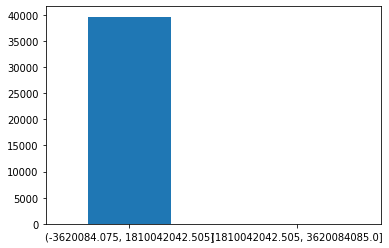

In [285]:
# Discretizando com 2 intervalos iguais
convenios['valor_dist'] = pd.cut(convenios['VALOR CONVÊNIO'],2)

counts = convenios['valor_dist'].value_counts()
counts.plot.bar(rot=0)

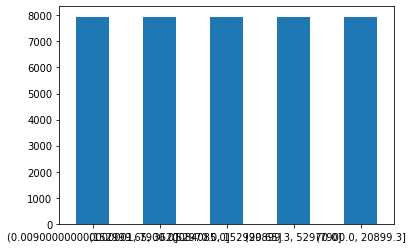

In [286]:
# Discretizando com números de elementos iguais
convenios['valor_dist'] = pd.qcut(convenios['VALOR CONVÊNIO'],5)
convenios['valor_dist'].value_counts()
counts = convenios['valor_dist'].value_counts()
counts.plot.bar(rot=0)

## Removendo Outliers


In [287]:
convenios['VALOR CONVÊNIO'].describe()

count    3.966100e+04
mean     6.398864e+05
std      2.032713e+07
min      1.000000e-02
25%      1.000000e+04
50%      3.560000e+04
75%      1.142841e+05
max      3.620084e+09
Name: VALOR CONVÊNIO, dtype: float64

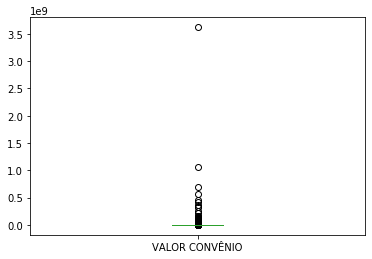

In [288]:
convenios['VALOR CONVÊNIO'].plot.box()

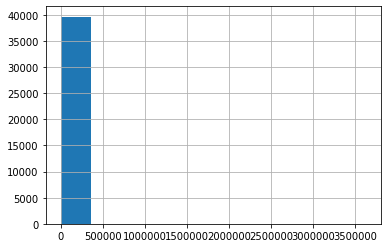

In [289]:
(convenios['VALOR CONVÊNIO']/1000).hist()

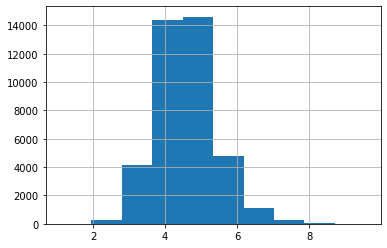

In [290]:
convenios['log_valor'] = convenios['VALOR CONVÊNIO'].apply(np.log10)
convenios[convenios['log_valor'] > 0]['log_valor'].hist()

In [291]:
# Utilizando z-score robusto (univariado)
from numpy import abs
mad = abs(convenios['log_valor'] - convenios['log_valor'].median()).median()*(1/0.6745)
print(mad)

0.7862077071045118


In [292]:
conveniosLimpos = convenios[abs(convenios['log_valor']-convenios['log_valor'].median())/mad < 3.5]
print(len(conveniosLimpos))

39506


In [293]:
# Utilizando Tukey
q1 = convenios['log_valor'].quantile(q=0.25)
q3 = convenios['log_valor'].quantile(q=0.75)
iqr = q3 - q1
print(iqr)


1.0579858505261077


In [294]:
conveniosLimposTukey = convenios[(convenios['log_valor'] > (q1-1.5*iqr)) & (convenios['log_valor'] < (q3+1.5*iqr))]
len(conveniosLimposTukey)

39043

## Visualização dos dados



In [295]:
import matplotlib.pyplot as plt
%matplotlib inline
#Imprimindo um mapa de calor usando a correlação de Spearman
convenios.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,VALOR CONVÊNIO,VALOR LIBERADO,VALOR CONTRAPARTIDA,valor_norm,log_valor
VALOR CONVÊNIO,1.0,0.83,0.51,1.0,1.0
VALOR LIBERADO,0.83,1.0,0.43,0.83,0.83
VALOR CONTRAPARTIDA,0.51,0.43,1.0,0.51,0.51
valor_norm,1.0,0.83,0.51,1.0,1.0
log_valor,1.0,0.83,0.51,1.0,1.0


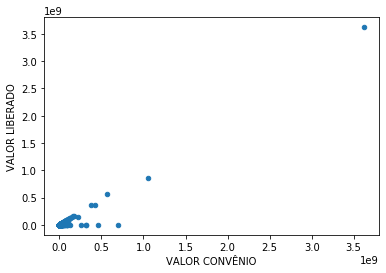

In [296]:
convenios.plot.scatter(x='VALOR CONVÊNIO', y='VALOR LIBERADO')

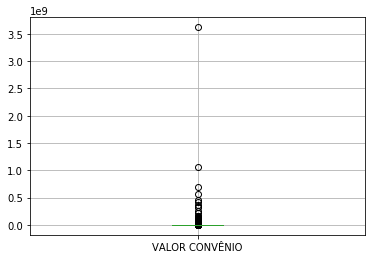

In [297]:
convenios.boxplot(column=['VALOR CONVÊNIO'])

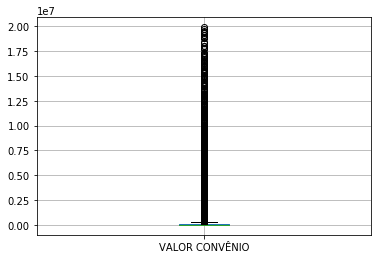

In [298]:
# Gráfico removendo os outliers com método de Z-Score Robusto
conveniosLimpos.boxplot(column=['VALOR CONVÊNIO'])

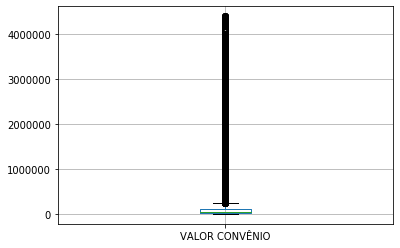

In [299]:
# Gráfico removendo os outliers com método de Tukey
conveniosLimposTukey.boxplot(column=['VALOR CONVÊNIO'])

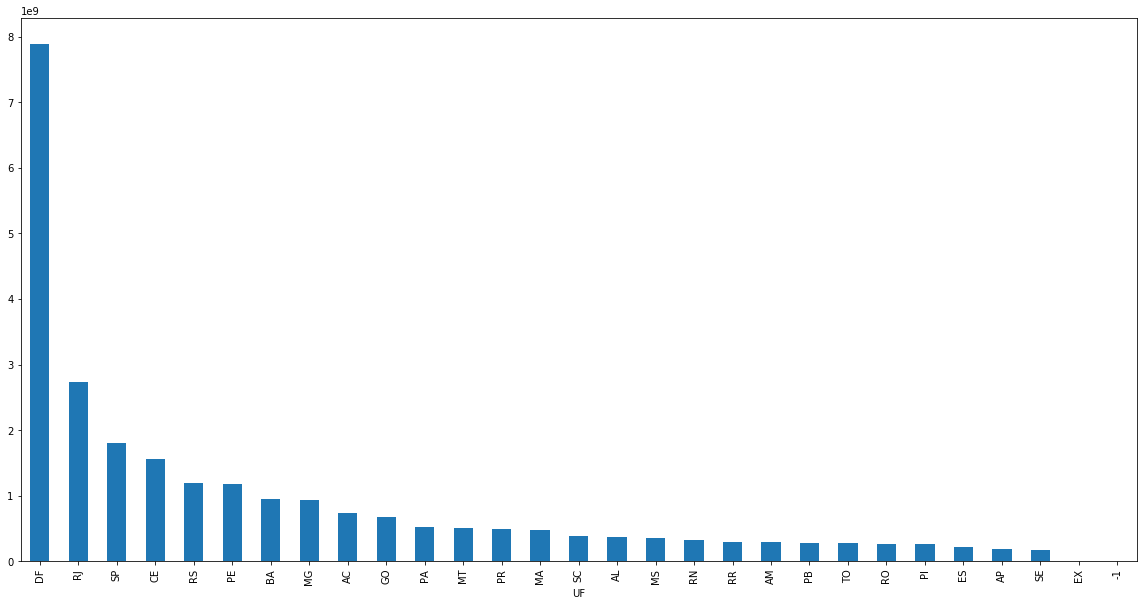

In [300]:
convenios.groupby(['UF'])['VALOR CONVÊNIO'].sum().sort_values(ascending=False).plot.bar(figsize=(20,10))

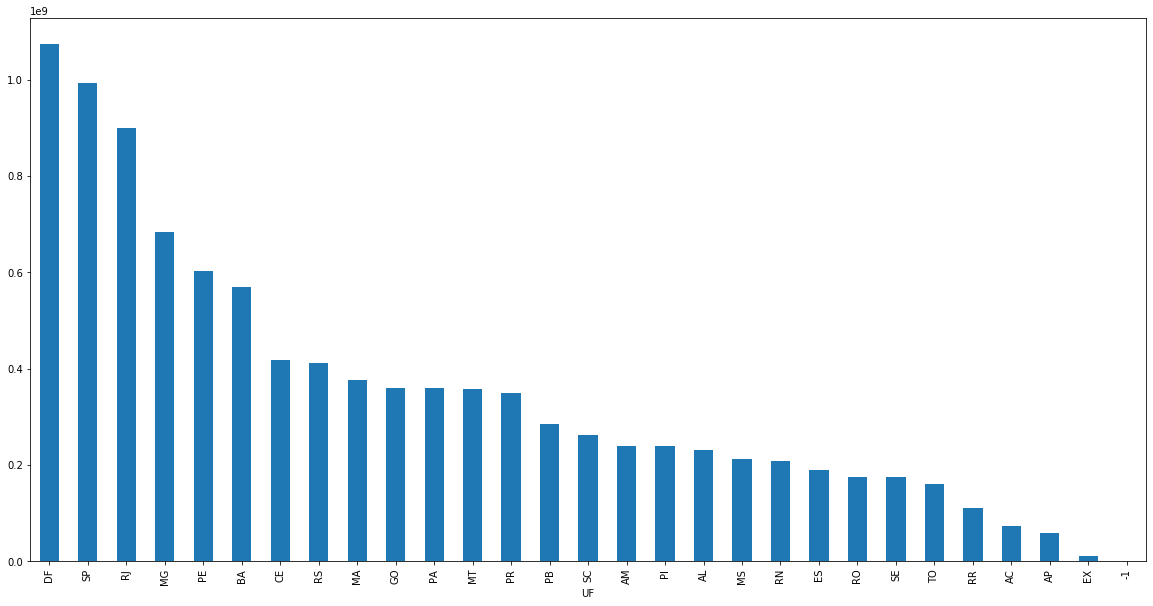

In [301]:
# Gráfico removendo os outliers com método de Z-Score Robusto
conveniosLimpos.groupby(['UF'])['VALOR CONVÊNIO'].sum().sort_values(ascending=False).plot.bar(figsize=(20,10))

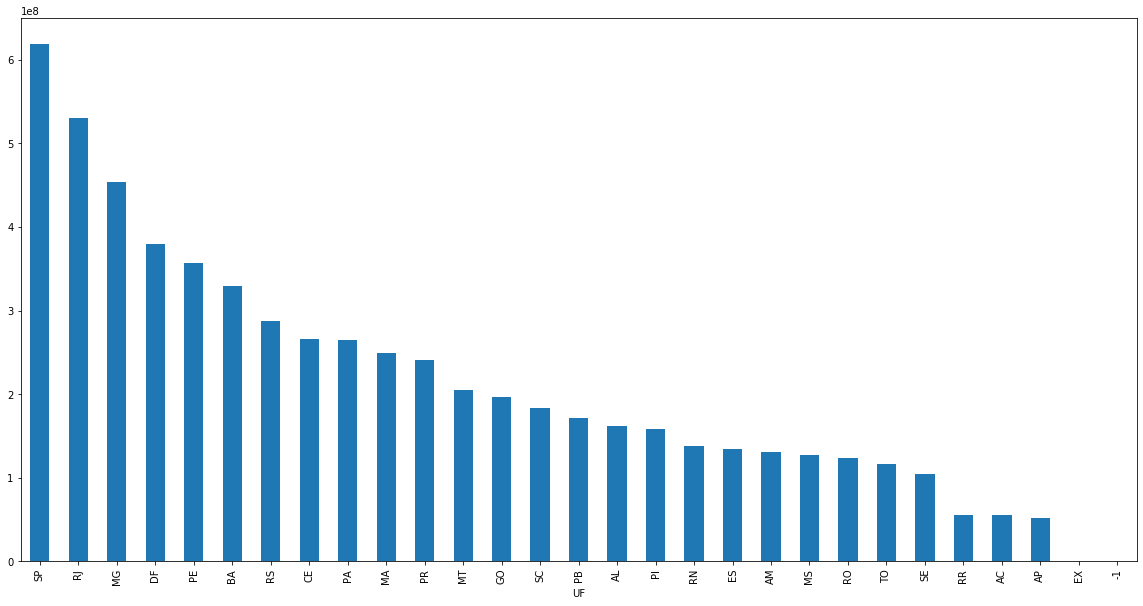

In [302]:
# Gráfico removendo os outliers com método de Tukey
conveniosLimposTukey.groupby(['UF'])['VALOR CONVÊNIO'].sum().sort_values(ascending=False).plot.bar(figsize=(20,10))

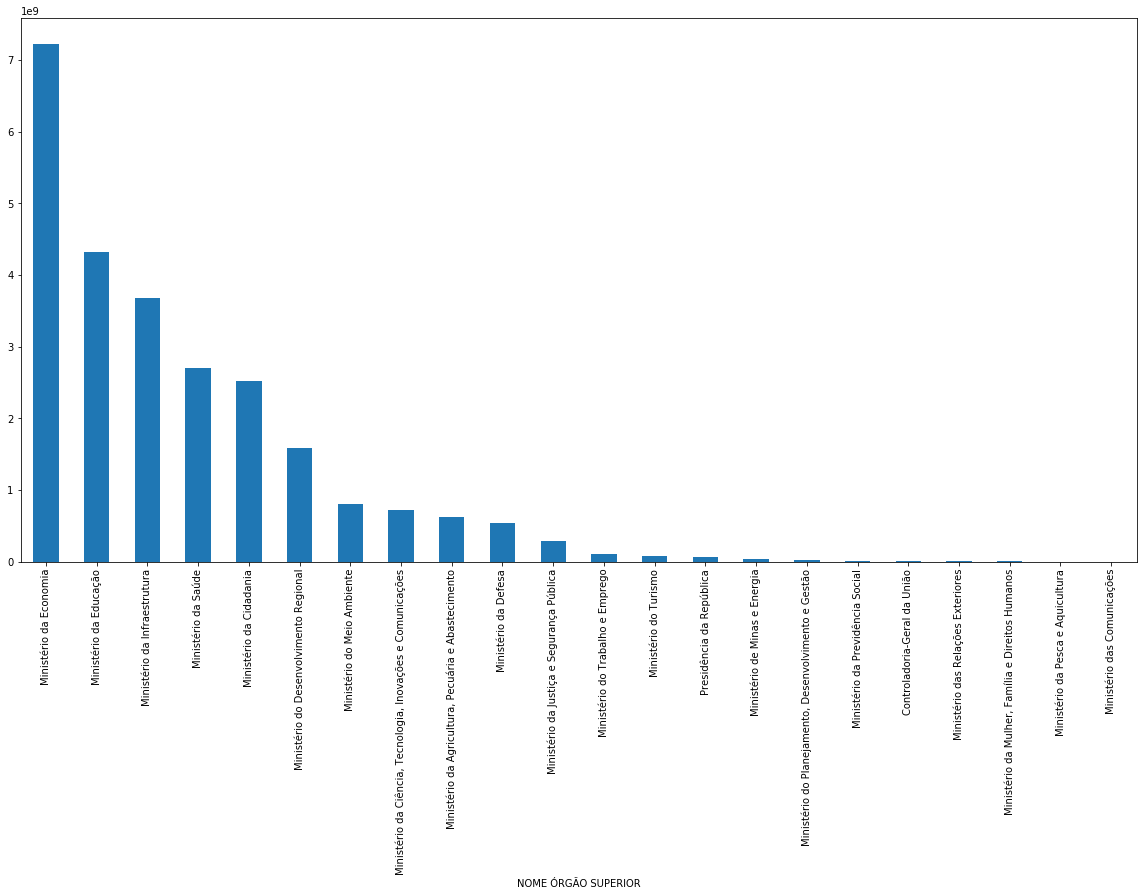

In [303]:
convenios.groupby(['NOME ÓRGÃO SUPERIOR'])['VALOR CONVÊNIO'].sum().sort_values(ascending=False).plot.bar(figsize=(20,10))

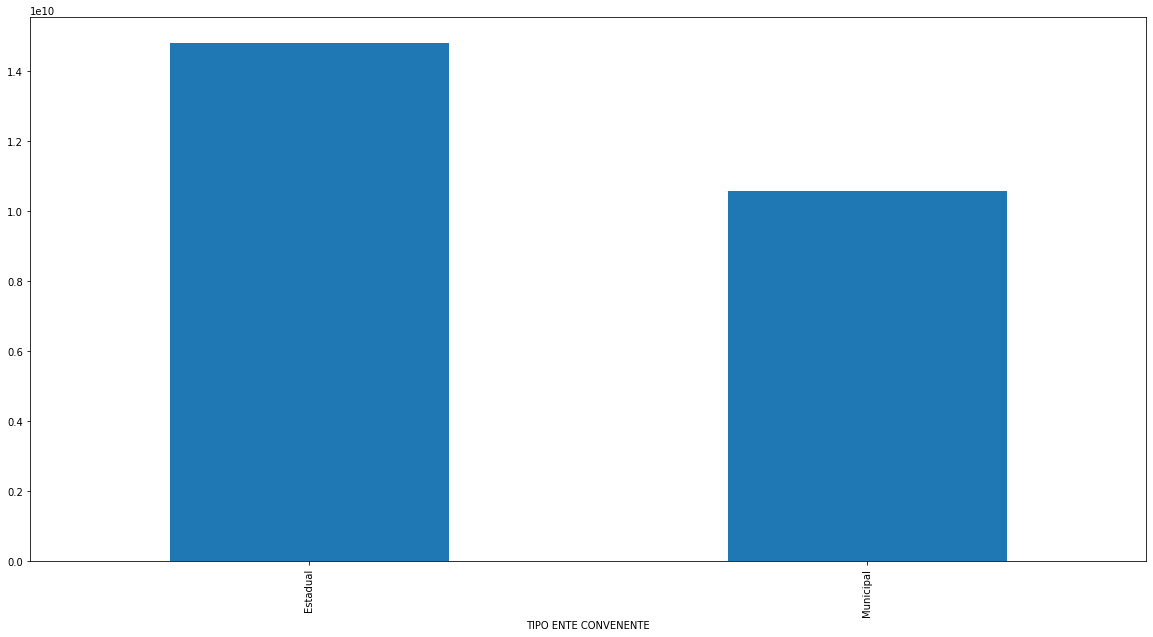

In [304]:
convenios.groupby(['TIPO ENTE CONVENENTE'])['VALOR CONVÊNIO'].sum().sort_values(ascending=False).plot.bar(figsize=(20,10))

In [305]:
convenios.groupby(['UF']).agg(['min', 'max', 'mean','median'])['VALOR CONVÊNIO']

,min,max,mean,median
UF,,,,
-1,1485.00,9.000000e+04,2.068953e+04,8685.00
AC,2400.00,3.195083e+08,2.567772e+06,58339.55
AL,729.00,7.658246e+07,4.877696e+05,62300.00
AM,544.00,2.985868e+07,4.934537e+05,79886.00
AP,780.00,1.276875e+08,9.397574e+05,60000.00
BA,1000.00,2.550000e+08,4.825730e+05,51400.00
CE,500.00,5.657078e+08,1.031240e+06,65070.00
DF,200.00,3.620084e+09,4.759432e+06,30000.00
ES,225.15,3.158714e+07,3.334277e+05,40000.00
